In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
samples = 50
packetSize= 5

def f(x):return -0.5*x+4
    
x_0 = -2.0
x_1 = 2.0
sigma = 0.5

In [13]:
np.random.seed(0)
               
data_x = np.arange(x_0, x_1, (x_1-x_0)/samples)
np.random.shuffle(data_x)

data_y = list(map(f, data_x)) + np.random.normal(0,sigma,samples)

In [14]:
print(','.join(list(map(str, data_x[:packetSize]))))
print(','.join(list(map(str, data_y[:packetSize]))))

0.240000000000002,-1.1199999999999992,-1.1999999999999993,1.280000000000003,-1.8399999999999999
3.6806069133240307,4.146401733256503,4.392127649207482,3.097743903134284,5.3265506359191255


In [26]:
tf_data_x = tf.placeholder(tf.float32, shape = (packetSize, ))
tf_data_y = tf.placeholder(tf.float32, shape = (packetSize, ))

In [27]:

weight = tf.Variable(initial_value=0.1, dtype=tf.float32, name="a")
bias = tf.Variable(initial_value=0.0, dtype=tf.float32, name="b")
model = tf.add(tf.multiply(tf_data_x, weight), bias)

In [28]:

loss = tf.reduce_mean(tf.square(model-tf_data_y))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss) 

ошибка: 18.209919
a = -3.028904, b = 4.181486
ошибка: 6.413265
a = -0.748101, b = 4.003547
ошибка: 0.215227
a = -0.649924, b = 4.114943
ошибка: 0.241518
a = -0.145189, b = 4.354897
ошибка: 1.453900
a = -0.819681, b = 3.461941
ошибка: 0.950273
a = -0.545023, b = 4.222816
ошибка: 0.108745
a = -0.236403, b = 3.951334
ошибка: 0.344000
a = -0.352084, b = 4.109691
ошибка: 0.134727
a = -0.597283, b = 4.182838
ошибка: 0.528606
a = -0.224429, b = 3.841881


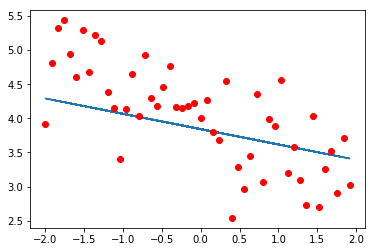

In [29]:
with tf.Session() as session:
    tf.global_variables_initializer().run()
    for i in range(samples//packetSize):
        feed_dict={tf_data_x: data_x[i*packetSize:(i+1)*packetSize], tf_data_y: data_y[i*packetSize:(i+1)*packetSize]}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict) 
        print("ошибка: %f" % (l, ))
        print("a = %f, b = %f" % (weight.eval(), bias.eval()))
    plt.plot(data_x, list(map(lambda x: weight.eval()*x+bias.eval(), data_x)), data_x, data_y, 'ro')